<a href="https://colab.research.google.com/github/HURU-School/Data-Science/blob/main/Exploring_the_Covid_19_Dataset_in_the_World_and_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code was written by John Mbatia whilst a data science student at HURU School 

# Importing required libraries.
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Read CSV Data To display the top 5 rows

df = pd.read_csv ("/content/sample_data/owid-covid-data-24.csv")



df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,WHO Region
0,OWID_WRL,NaN,World,3/24/2021,124841355.0,636719.0,515017.714,2743729.0,9664.0,8980.857,16015.982,81.685,66.072,351.995,1.240,1.152,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493947715.0,288059254.0,111542004.0,13441082.0,13069390.0,6.34,3.70,1.43,1677.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
1,OWID_EUR,NaN,Europe,3/24/2021,38377461.0,259056.0,199110.000,890696.0,3700.0,3247.571,51260.161,346.017,265.948,1189.688,4.942,4.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110346971.0,82448160.0,27846277.0,2302834.0,2303357.0,14.74,11.01,3.72,3077.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OWID_NAM,NaN,North America,3/24/2021,34592075.0,101034.0,70518.714,795298.0,2118.0,1600.571,58425.433,170.645,119.105,1343.245,3.577,2.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142877802.0,95975226.0,47911265.0,2634571.0,2875714.0,24.13,16.21,8.09,4857.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,North America,United States,3/24/2021,30011839.0,86947.0,57625.857,545264.0,1454.0,975.714,90669.483,262.678,174.095,1647.310,4.393,2.948,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130473853.0,85472166.0,46365515.0,2256824.0,2490889.0,39.01,25.56,13.86,7448.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
4,OWID_ASI,NaN,Asia,3/24/2021,27382751.0,146664.0,126927.714,419759.0,1123.0,990.286,5901.649,31.610,27.356,90.468,0.242,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199747998.0,79773522.0,24722989.0,6643827.0,6781846.0,4.31,1.72,0.53,1462.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_list = df
#data.set_index('iso_code')
data = pd.DataFrame(data_list)
data = data[['continent','aged_65_older','weekly_icu_admissions','date','location','population','female_smokers','male_smokers','new_deaths','total_deaths','new_cases','total_cases']]
data.columns = ('Continent','aged_65_older','WIA','Date','Country','Population','Female Smokers','Male Smokers','New Deaths','Total Deaths','New Cases','Total Cases')
data['Continent'].fillna(value = '', inplace = True)
data.head(5)

,Continent,aged_65_older,WIA,Date,Country,Population,Female Smokers,Male Smokers,New Deaths,Total Deaths,New Cases,Total Cases
0,,8.696,NaN,3/24/2021,World,7.794799e+09,6.434,34.635,9664.0,2743729.0,636719.0,124841355.0
1,,NaN,NaN,3/24/2021,Europe,7.486801e+08,NaN,NaN,3700.0,890696.0,259056.0,38377461.0
2,,NaN,NaN,3/24/2021,North America,5.920722e+08,NaN,NaN,2118.0,795298.0,101034.0,34592075.0
3,North America,15.413,NaN,3/24/2021,United States,3.310026e+08,19.100,24.600,1454.0,545264.0,86947.0,30011839.0
4,,NaN,NaN,3/24/2021,Asia,4.639847e+09,NaN,NaN,1123.0,419759.0,146664.0,27382751.0


In [ ]:
# To display the bottom 5 rows
data.tail(5) 

,Continent,Country,Population,Female Smokers,Male Smokers,Total Cases,New deaths,Total Deaths,New Cases
77065,Africa,Zimbabwe,14862927.0,1.6,30.7,36662.0,0.0,1510.0,10.0
77066,Africa,Zimbabwe,14862927.0,1.6,30.7,36665.0,2.0,1512.0,3.0
77067,Africa,Zimbabwe,14862927.0,1.6,30.7,36684.0,2.0,1514.0,19.0
77068,Africa,Zimbabwe,14862927.0,1.6,30.7,36717.0,2.0,1516.0,33.0
77069,Africa,Zimbabwe,14862927.0,1.6,30.7,36749.0,0.0,1516.0,32.0


In [ ]:
# Checking the data type
data.dtypes

Continent          object
Country            object
Population        float64
Female Smokers    float64
Male Smokers      float64
Total Cases       float64
New deaths        float64
Total Deaths      float64
New Cases         float64
dtype: object

In [ ]:
# Checking the data shape

df.shape

(77070, 59)

In [ ]:
# Checking the data count

df.count()  

iso_code                                 77070
continent                                73292
location                                 77070
date                                     77070
total_cases                              75709
new_cases                                75707
new_cases_smoothed                       74706
total_deaths                             66380
new_deaths                               66538
new_deaths_smoothed                      74706
total_cases_per_million                  75297
new_cases_per_million                    75295
new_cases_smoothed_per_million           74299
total_deaths_per_million                 65981
new_deaths_per_million                   66139
new_deaths_smoothed_per_million          74299
reproduction_rate                        62208
icu_patients                              7930
icu_patients_per_million                  7930
hosp_patients                             9550
hosp_patients_per_million                 9550
weekly_icu_ad

In [ ]:

# a. Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(data.groupby('location')['new_cases'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'new_cases', size = 'new_cases', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Total Cases Countries')
fig1.show()


In [ ]:

#plotting top 10 countries in Africa affected by new case and the case for putting Kenya on lock down, we also compare with new deaths reported

#below we filter data set to continent Africa and filter by new cases

# Africa

Continent_Africa = data['Continent'] == 'Africa'
Continent_Africa = data[Continent_Africa].nlargest(10, 'New Cases')

In [ ]:
#go.Bar(name = 'Total Cases', x = Continent_Africa_Date['Country'], y = Continent_Africa_Date['New Cases']),

# Africa
fig6 = go.Figure(data = [
    go.Bar(name = 'New Cases', x = Continent_Africa['Country'], y = Continent_Africa['New Cases']),
    go.Bar(name = 'New Deaths', x = Continent_Africa['Country'], y = Continent_Africa['New Deaths'])
 
])
fig6.update_layout(title = 'Most Affected Countries in Africa', barmode = 'stack', height = 600)
fig6.show()

In [ ]:
#Below will be plotting a time series to show how COVID-19 Cases have progressed over time, from Total cases, New Death and New Cases
#we are using data source from https://ourworldindata.org/coronavirus-source-data

time_series = pd.read_csv('/content/sample_data/owid-covid-data.csv', encoding = 'ISO-8859-1')
time_series
time_series['date'] = pd.to_datetime(time_series['date'])


In [ ]:
#Below summing and grouping by Date

time_series_dates = time_series.groupby('date').sum()

time_series_dates.head(5)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,29.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174128530.0,82.621,61.2,18.055,11.762,36270.376,3.1,343.815,18.56,23.1,49.1,87.847,6.38,151.72,1.624
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,144.0,0.002,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174128530.0,82.621,61.2,18.055,11.762,36270.376,3.1,343.815,18.56,23.1,49.1,87.847,6.38,151.72,1.624
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,237.0,0.002,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174128530.0,82.621,61.2,18.055,11.762,36270.376,3.1,343.815,18.56,23.1,49.1,87.847,6.38,151.72,1.624
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,301.0,0.004,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243928508.0,217.753,101.3,29.428,18.652,52548.047,3.2,453.676,25.60,25.0,87.9,178.517,8.48,228.87,2.401
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,394.0,0.004,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243928508.0,217.753,101.3,29.428,18.652,52548.047,3.2,453.676,25.60,25.0,87.9,178.517,8.48,228.87,2.401


In [ ]:
# Cumulative cases- below ploting how worldwide Total cases have progressed over time

fig11 = go.Figure()
fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['total_cases'], fill = 'tonexty',
                          line_color = 'blue'))
fig11.update_layout(title = 'Cumulative Cases Worldwide')
fig11.show()

In [ ]:
# Cumulative death cases- below plotting how worldwide Total Deaths have progressed over time

fig12 = go.Figure()
fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['total_deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig12.update_layout(title = 'Cumulative Deaths Worldwide')
fig12.show()

In [ ]:
# Daily new cases-below plotting how worldwide Daily New Cases have progressed over time

fig13 = go.Figure()
fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['new_cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig13.update_layout(title = 'Daily New Cases Worldwide')
fig13.show()

In [ ]:
# Daily death cases-below plotting how worldwide daily death cases have progressed over time

fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['new_deaths'], fill = 'tonexty',
                          line_color = 'hotpink'))
fig14.update_layout(title = 'Daily Death Cases Worldwide')
fig14.show()

In [ ]:
#Below 4 countries of Interest to Kenya on how Kenya compares to them regarding various covid stats such as total cases, new deaths and new cases 
#we filter using the timeseries data set above by country
# Kenya
time_series_Kenya = time_series['location'] == ('Kenya')
time_series_Kenya = time_series[time_series_Kenya]

# Ethiopia
time_series_Ethiopia = time_series['location'] == ('Ethiopia')
time_series_Ethiopia = time_series[time_series_Ethiopia]

# South_Africa
time_series_South_Africa = time_series['location'] == ('South Africa')
time_series_South_Africa = time_series[time_series_South_Africa]

# Uganda
time_series_Uganda = time_series['location']== ('Uganda')
time_series_Uganda = time_series[time_series_Uganda]

# South_Sudan
time_series_South_Sudan = time_series['location'] == ('South Sudan')
time_series_South_Sudan = time_series[time_series_South_Sudan]

In [ ]:

# Total cases- we now plot the filtered by country datasets to a time series

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Kenya['date'], y = time_series_Kenya['total_cases'], name = 'Kenya'))
fig15.add_trace(go.Line(x = time_series_Ethiopia['date'], y = time_series_Ethiopia['total_cases'], name = 'Ethiopia'))
fig15.add_trace(go.Line(x = time_series_South_Africa['date'], y = time_series_South_Africa['total_cases'], name = 'South Africa'))
fig15.add_trace(go.Line(x = time_series_South_Sudan['date'], y = time_series_South_Sudan['total_cases'], name = 'South Sudan'))
fig15.add_trace(go.Line(x = time_series_Uganda['date'], y = time_series_Uganda['total_cases'], name = 'Uganda'))

fig15.update_layout(title = 'Time Series Countries of Interest for Kenya Total Cases')

fig15.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Total Deaths

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Kenya['date'], y = time_series_Kenya['total_deaths'], name = 'Kenya'))
fig15.add_trace(go.Line(x = time_series_Ethiopia['date'], y = time_series_Ethiopia['total_deaths'], name = 'Ethiopia'))
fig15.add_trace(go.Line(x = time_series_South_Africa['date'], y = time_series_South_Africa['total_deaths'], name = 'South Africa'))
fig15.add_trace(go.Line(x = time_series_South_Sudan['date'], y = time_series_South_Sudan['total_deaths'], name = 'South Sudan'))
fig15.add_trace(go.Line(x = time_series_Uganda['date'], y = time_series_Uganda['total_deaths'], name = 'Uganda'))

fig15.update_layout(title = 'Time Series Countries of Interest for Kenya Total Deaths')

fig15.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Cumulative New Cases

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Kenya['date'], y = time_series_Kenya['new_cases'], name = 'Kenya'))
fig15.add_trace(go.Line(x = time_series_Ethiopia['date'], y = time_series_Ethiopia['new_cases'], name = 'Ethiopia'))
fig15.add_trace(go.Line(x = time_series_South_Africa['date'], y = time_series_South_Africa['new_cases'], name = 'South Africa'))
fig15.add_trace(go.Line(x = time_series_South_Sudan['date'], y = time_series_South_Sudan['new_cases'], name = 'South Sudan'))
fig15.add_trace(go.Line(x = time_series_Uganda['date'], y = time_series_Uganda['new_cases'], name = 'Uganda'))

fig15.update_layout(title = 'Time Series Countries of Interest for Kenya New Cases')

fig15.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Cumulative New Deaths

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Kenya['date'], y = time_series_Kenya['new_deaths'], name = 'Kenya'))
fig15.add_trace(go.Line(x = time_series_Ethiopia['date'], y = time_series_Ethiopia['new_deaths'], name = 'Ethiopia'))
fig15.add_trace(go.Line(x = time_series_South_Africa['date'], y = time_series_South_Africa['new_deaths'], name = 'South Africa'))
fig15.add_trace(go.Line(x = time_series_South_Sudan['date'], y = time_series_South_Sudan['new_deaths'], name = 'South Sudan'))
fig15.add_trace(go.Line(x = time_series_Uganda['date'], y = time_series_Uganda['new_deaths'], name = 'Uganda'))

fig15.update_layout(title = 'Time Series Countries of Interest for Kenya New Cases')

fig15.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
#Below we plot using a pie chart the distribution of Total covid cases by Continent
who = pd.read_csv('/content/sample_data/owid-covid-data-24.csv')
who_region = pd.DataFrame(who.groupby('WHO Region')['total_cases'].sum())

labels = who_region.index
values = who_region['total_cases']

fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])

fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 700, height = 400, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig9.show()

In [ ]:
#Below we compare the number of positive cases againist total tests done using pie charts
#below we define our data source 

negative_positive = pd.read_csv('/content/sample_data/owid-covid-data.csv')
negative_positive = negative_positive.groupby('continent')[['total_cases','total_tests']].sum()

explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-package

Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

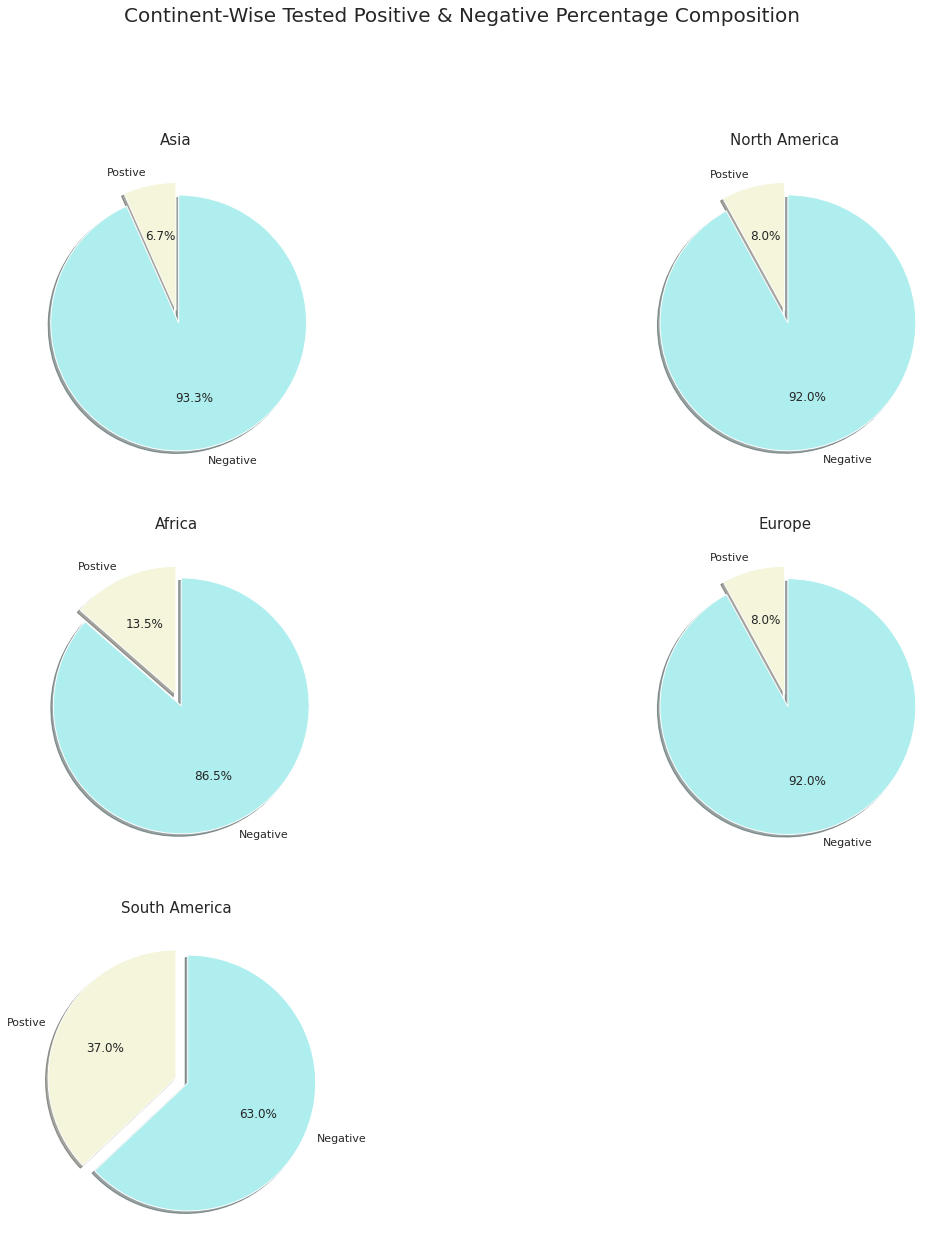

In [ ]:
#below we define our variables the continents

fig = plt.figure(figsize = (20,20))

plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)

plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'Africa'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Africa', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.subplot(325)
plt.pie(negative_positive[negative_positive.index == 'South America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)


In [ ]:
# We are also interested in Africa how new deaths, new cases and total cases compare for Kenya and four other African countries of interest in Africa

# we define the variable below per country
case_dist = who

# Kenya
dist_Kenya = case_dist['location'] == 'Kenya'
dist_Kenya = case_dist[dist_Kenya][['location','total_deaths','new_cases','total_cases']].set_index('location')

# Ethiopia
dist_Ethiopia = case_dist['location'] == 'Ethiopia'
dist_Ethiopia = case_dist[dist_Ethiopia][['location','total_deaths','new_cases','total_cases']].set_index('location')

# South Africa
dist_South_Africa= case_dist['location'] == 'South Africa'
dist_South_Africa = case_dist[dist_South_Africa][['location','total_deaths','new_cases','total_cases']].set_index('location')

# South Sudan
dist_South_Sudan = case_dist['location'] == 'South Sudan'
dist_South_Sudan = case_dist[dist_South_Sudan][['location','total_deaths','new_cases','total_cases']].set_index('location')

# Uganda
dist_Uganda = case_dist['location'] == 'Uganda'
dist_Uganda = case_dist[dist_Uganda][['location','total_deaths','new_cases','total_cases']].set_index('location')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 0.98, 'Case Classification Countries of Interest for Kenya')

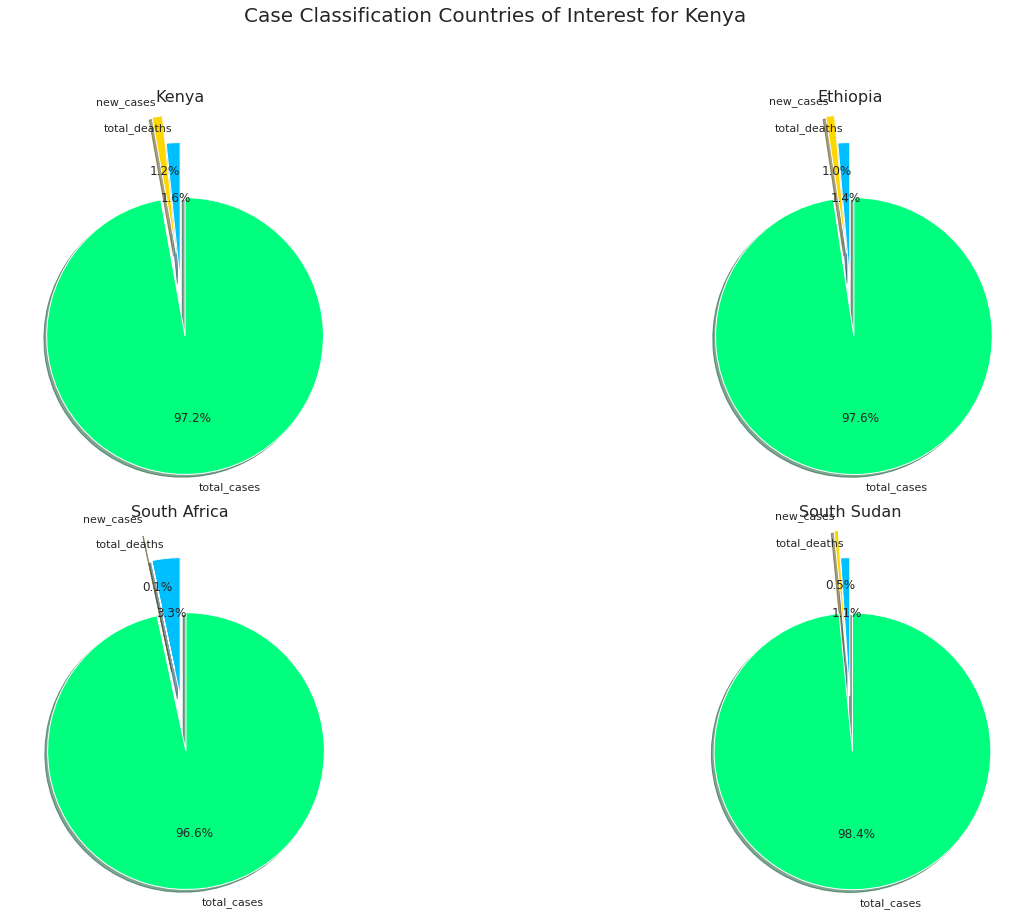

In [ ]:
# we now plot the data into 4 pie charts

fig = plt.figure(figsize = (22,14))
colors_series = ['deepskyblue','gold','springgreen','coral']
explode = (0,0.2,0.4)

plt.subplot(221)
plt.pie(dist_Kenya, labels = dist_Kenya.columns, colors = colors_series, explode = explode,startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('Kenya', fontsize = 16)

plt.subplot(222)
plt.pie(dist_Ethiopia, labels = dist_Ethiopia.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('Ethiopia', fontsize = 16)

plt.subplot(223)
plt.pie(dist_South_Africa, labels = dist_South_Africa.columns, colors = colors_series, explode = explode, startangle = 90, autopct = '%.1f%%',
       shadow = True)
plt.title('South Africa', fontsize = 16)


plt.subplot(224)
plt.pie(dist_South_Sudan, labels = dist_South_Sudan.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('South Sudan', fontsize = 16)

plt.suptitle('Case Classification Countries of Interest for Kenya', fontsize = 20)
